# Correlation and Autocorrelation in Time Series - Lab

## Introduction

In this lab, You'll practice your knowledge on correlation, autocorrelation and the ACF and PACF.

## Objectives

You will be able to:
- Understand correlation in Time Series
- Plot and discuss the autocorrelation function (ACF) for a time-series 
- Plot and discuss the partial autocorrelation function (PACF) for a time-series 
- Interpret ACF and PACF and Identify use cases both functions

## The Exchange Rate Data

We'll be looking at the exchange rates dataset again. First, import the necessary libraries for time series and plotting. Then import the data (in `exch_rates.csv`) and make sure it's set in the correct time series format with the `datetime` as the index.

In [1]:
import pandas as pd
from pandas import Series
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [3]:
exrate=pd.read_csv('exch_rates.csv')
exrate.info()
exrate['Frequency']=pd.to_datetime(exrate.Frequency)
exrate.set_index('Frequency', inplace=True)
exrate.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6905 entries, 0 to 6904
Data columns (total 4 columns):
Frequency            6905 non-null object
Euro                 4838 non-null float64
Australian Dollar    4838 non-null float64
Danish Krone         4838 non-null float64
dtypes: float64(3), object(1)
memory usage: 215.9+ KB


,Euro,Australian Dollar,Danish Krone
Frequency,,,
2000-01-01,NaN,NaN,NaN
2000-01-02,NaN,NaN,NaN
2000-01-03,0.991080,1.520912,7.374034
2000-01-04,0.970403,1.521300,7.222610
2000-01-05,0.964506,1.521316,7.180170


Plot the three exchange rates in one plot

Text(0.5, 0, 'Year')

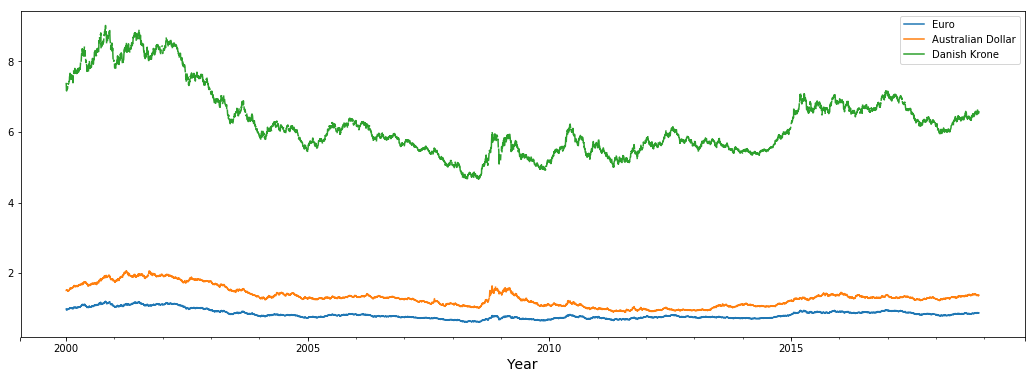

In [4]:
exrate.plot(figsize=(18,6))
plt.xlabel('Year', fontsize=14)

You can see that the EUR/USD and AUD/USD exchange rate are somewhere between rougly 0.5 and 2 between 2000 and 2018, where the Danish Krone is somewhere between roughly 4.5 and 9. Now let's look at the correlations between these time series.

In [5]:
exrate.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.883181,0.999952
Australian Dollar,0.883181,1.000000,0.882513
Danish Krone,0.999952,0.882513,1.000000


### What is your conclusion here? You might want to use outside resources to understand what's going on.

The exchange rates for Euro and the Australian dollar are highly correlated, but there are differences. The Euro and the Danish Krone, however, is perfectly correlated. The Danish Krone is pegged to the Euro, which means that they are basically designed to perfectly correlate together! The fact that the value is just very close to 1 is due to rounding errors.



Next, look at the plots of the differenced series. Use subplots to plot them rather than creating just one plot.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa04894fa20>,
      dtype=object)

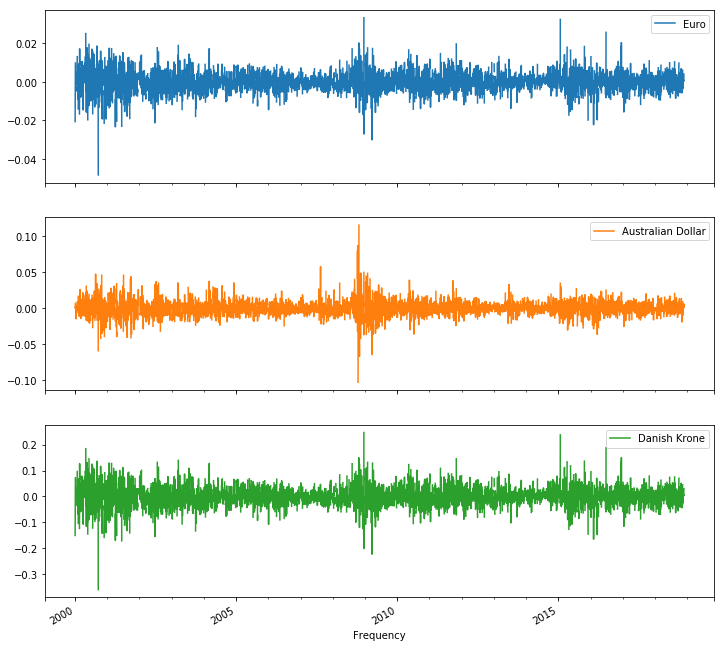

In [6]:
exrate_diff=exrate.diff(periods=1)
exrate_diff.plot(figsize=(12,12), subplots=True, legend=True)

In [7]:
exrate_diff.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.545369,0.999667
Australian Dollar,0.545369,1.000000,0.545133
Danish Krone,0.999667,0.545133,1.000000


### Explain what's going on

Differencing the series here led to a decrease in correlation between the EUR/USD and AUD/USD series. If you think a little further, the high correlation was a result of seasonality. Differencing led to an decrease in correlation between series, here the series are moving in the (more or less) same direction on a day-to-day basis.



Next, let's look at the "lag 1 autocorrelation" for the EUR/USD exchange rate. Create a "lag 1 autocorrelation" series, plot the result, and look at the correlation coefficient.

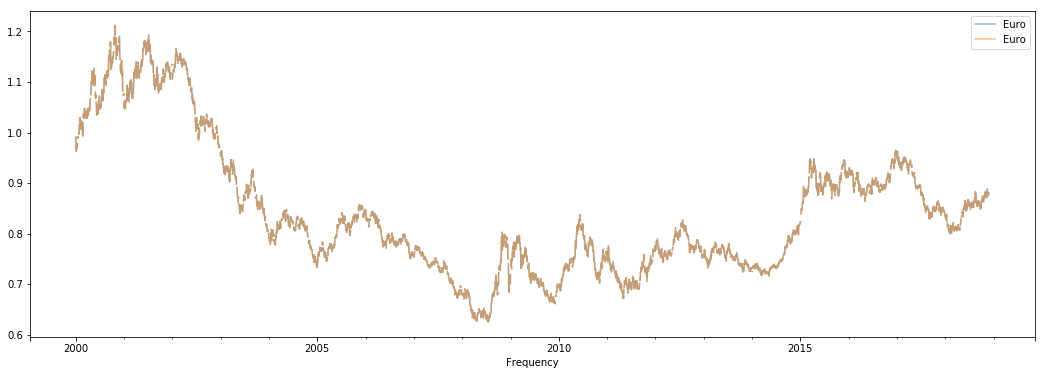

In [8]:
eur=exrate.Euro
eur_shift_1 = eur.shift(periods=1)
eur_shift_1.head()

lag_1= pd.concat([eur_shift_1, eur], axis=1)
lag_1.plot(figsize=(18,6), alpha=0.5);

In [9]:
lag_1.corr()

,Euro,Euro
Euro,1.000000,0.999146
Euro,0.999146,1.000000


Repeat this, but for a "lag 5 autocorrelation"

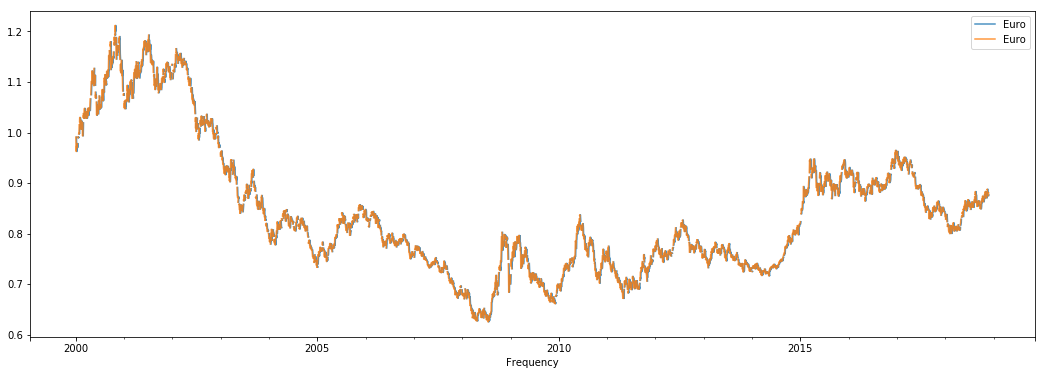

In [10]:
eur=exrate.Euro
eur_shift_5 = eur.shift(periods=5)
eur_shift_5.head()

lag_5= pd.concat([eur_shift_5, eur], axis=1)
lag_5.plot(figsize=(18,6), alpha=0.8);

In [11]:
lag_5.corr()

,Euro,Euro
Euro,1.000000,0.997518
Euro,0.997518,1.000000


### What's your conclusion here?

Autocorrelation is high in these time series, even up to a lag as big as 5! This is no big surprise though: remember that these are random walk series, which are highly recursive, as each value depends heavily on the previous one!



Knowing this, let's plot the ACF now.

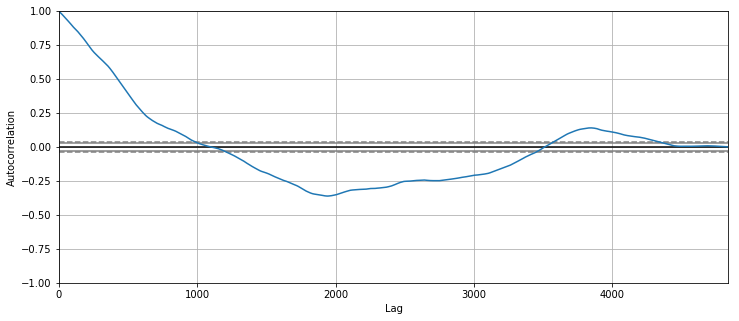

In [12]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(eur.dropna());

The series is heavily autocorrelated at first, and then there is a decay. This is a typical result for a series that is a random walk, generally you'll see heavy autocorrelations first, slowly tailing off until there is no autocorrelation anymore.

Next, let's look at the Partial Autocorrelation Function.

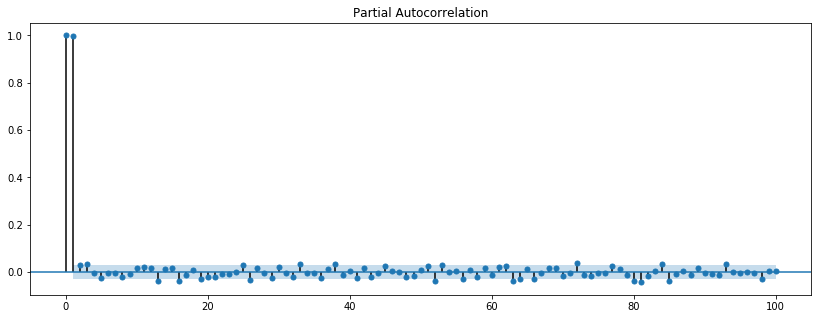

In [13]:
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_pacf(eur.dropna(), lags = 100);

This is interesting! Remember that *Partial Autocorrelation Function* gives the partial correlation of a time series with its own lagged values, controlling for the values of the time series at all shorter lags. When controlling for 1 period lags, the PACF is only very high for one-period lags, and basically 0 for shorter lags. This is again a typical result for Random Walk series!

## The Airpassenger Data

Look at ACF and PACF for the airpassenger data and describe the result `passengers.csv`. Do this both for the differenced and regular series.

In [3]:
travel=pd.read_csv('passengers.csv', index_col='Month')
travel.index=pd.to_datetime(travel.index)
travel.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
#Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


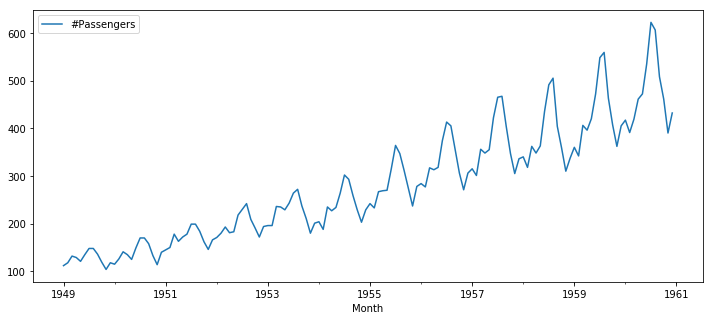

In [21]:
travel.plot(figsize=(12,5))

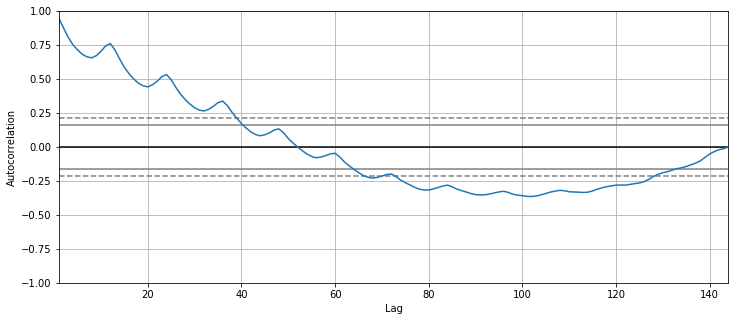

In [5]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(travel);

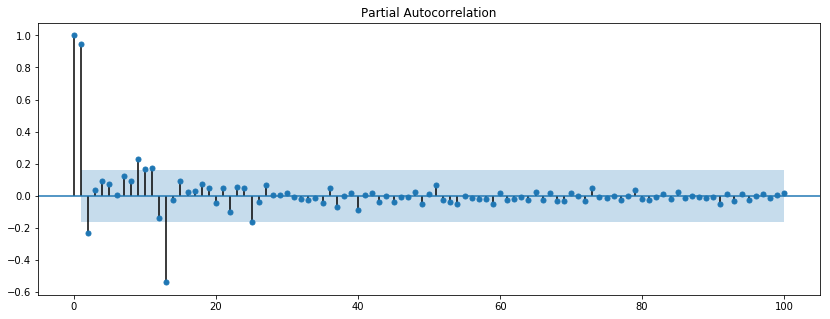

In [19]:
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_pacf(travel.dropna(), lags=100, method='ywm');

In [8]:
travel_diff = travel.diff(periods=1)

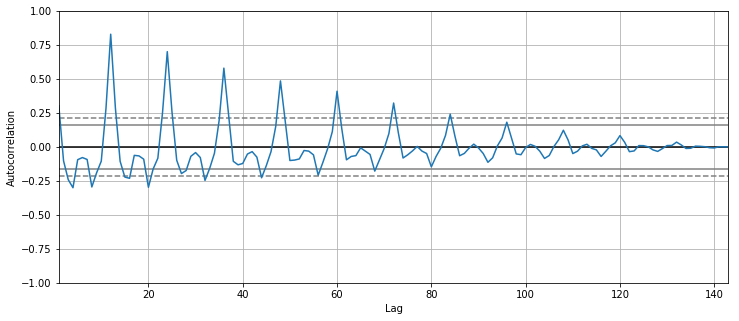

In [9]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(travel_diff.dropna());

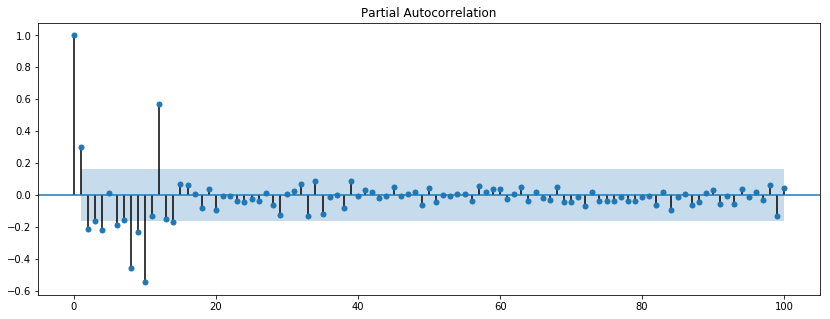

In [20]:
rcParams['figure.figsize'] = 14, 5

plot_pacf(travel_diff.dropna(), lags = 100, method='ywm');

### Your conclusion here

The result reminds us a lot of the google trends data. the seasonality is much more clear in the differenced time series. The PACF has just one very strong correlation, right at 12 months.

## The NYSE data

Look at correlation and autocorrelation functions for the NYSE data ("NYSE_monthly.csv")

In [22]:
data = pd.read_csv("NYSE_monthly.csv")
col_name= 'Month'
data[col_name] = pd.to_datetime(data[col_name])
data.set_index(col_name, inplace=True)
data.head()

,monthly_return
Month,
1961-01-01,0.082
1961-02-01,0.059
1961-03-01,0.050
1961-04-01,0.008
1961-05-01,0.042


In [ ]:
# your code here

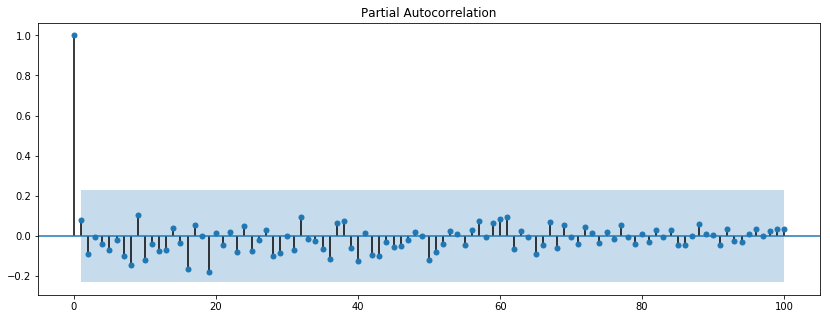

In [24]:
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_pacf(data, lags = 100, method='ywm');

## Your conclusion here



## Summary

Great, you've now been introduced to correlation, the ACF and PACF. Let's move into more serious modeling with autoregressive and moving average models!